# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg"**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

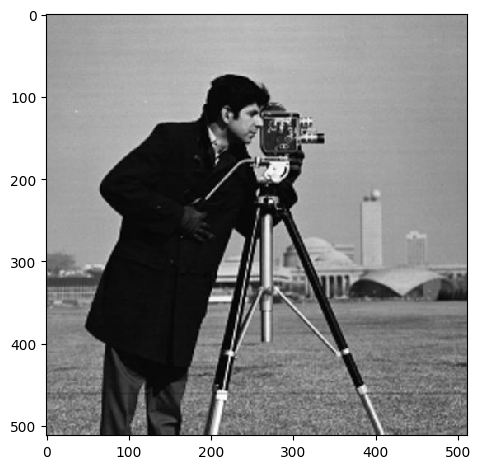

In [348]:
from skimage.io import imread, imsave, imshow
%matplotlib inline
testimg1 = imread('camera.jpg')
imshow(testimg1)
imsave('camera_copy.jpg',testimg1)

**Try the same with "view.jpg"**

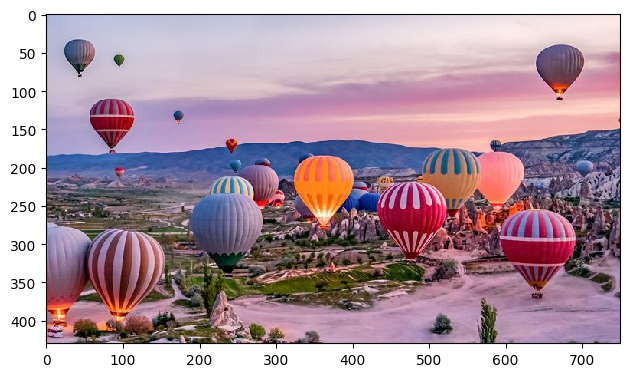

In [349]:
testimg2 = imread('view.jpg')
imshow(testimg2)
imsave('view_copy.jpg', testimg2)

When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" and "view" images:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?


In [350]:
import numpy as np
print('Image shape : ', testimg1.shape)
print('Min:', np.min(testimg1))
print('Max:', np.max(testimg1))
print('Data type:',testimg1.dtype)

print('Image shape : ', testimg2.shape)
print('Min:', np.min(testimg2))
print('Max:', np.max(testimg2))
print('Data type:',testimg2.dtype)


Image shape :  (512, 512)
Min: 0
Max: 255
Data type: uint8
Image shape :  (430, 750, 3)
Min: 0
Max: 255
Data type: uint8


Note the difference in image shape between a camera.jpg and an view.jpg. The shape of the ndarray show the layers of the matrix. The first two numbers are length and width, and the third number (i.e. 3 in view.jpg) is for three layers: Red, Green, Blue. So, camera.jpg has only one channel making it a greyscale image and view.jpg an RGB image. 

The data type of pixel value is the same for both the images - uint8 which means that the value of each pixel is an 8-bit unsigned integer and the value cannot be outside of the 0 to 255 range.
For a grey scale image 0 corresponds to black pixel value and 255 to white pixel value and the numbers in between have correspond to varying shades of grey.
The red, green and blue use 8 bits each, which have integer values from 0 to 255. This makes 256x256x256=16777216 possible colors.

The actual information that is stored in an image is the "value" of each pixel. With the above information, try to show the pixel values at different spots in the images, for example the camera's coat, sky in both the images, and the hot air balloon from view.jpg.
Also try to show only a 100x100 pixels window taken at the center of the image, head of the cameraman and a single hot air balloon.

In [351]:
## -- Your code here -- ##

In [352]:
## -- Your code here -- ##

In [353]:
## -- Your code here -- ##

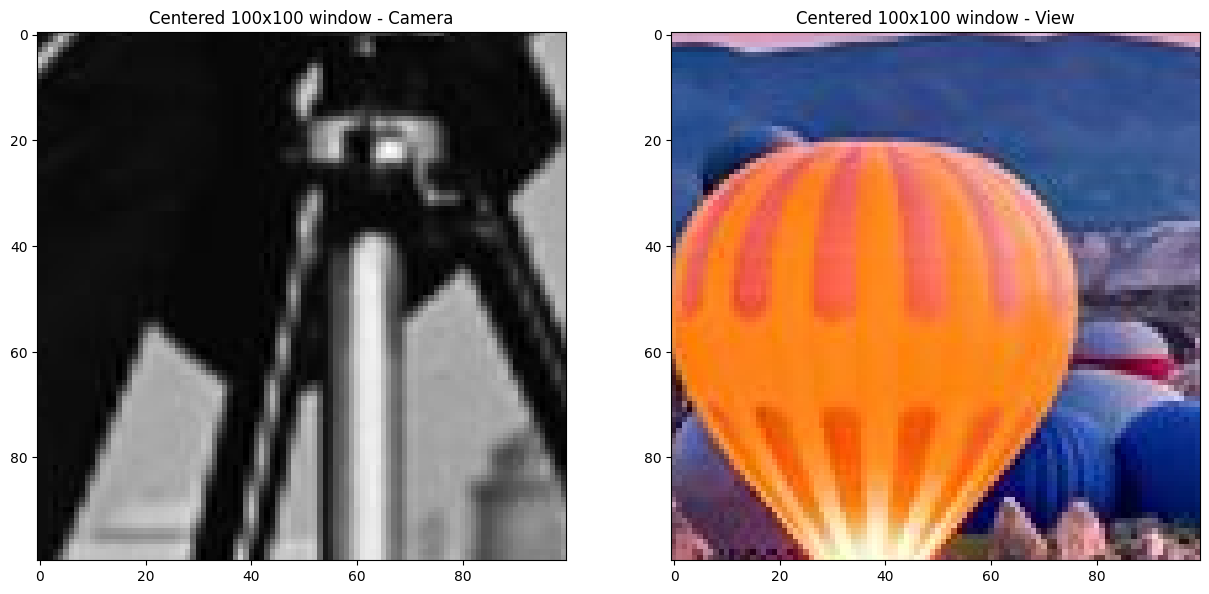

In [354]:
import matplotlib.pyplot as  plt

#Function that returns a pixels window taken at the center
def centered_window(img):
    x_center = img.shape[1]//2
    y_center = img.shape[0]//2
    half_window = 100 // 2
    return img[y_center - half_window: y_center+ half_window, x_center-half_window :x_center + half_window]

plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.imshow(centered_window(testimg1), cmap = 'gray')
plt.title('Centered 100x100 window - Camera')
plt.subplot(1,2,2)
plt.imshow(centered_window(testimg2))
plt.title('Centered 100x100 window - View')
plt.show()

**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

### Compute and plot the histogram and the normalized histogram

 Computer image analysis is about finding ways to use that "raw" information in order to extract "processed" information : what is in the image?

Image histograms are one of the simplest ways of looking at the information contained in an image. An image histogram is made by simply counting the number of pixels that have a given value. The length of the histogram will therefore correspond to the number of possible values in an image (in this case, 256).

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

First, lets have a look at the images as arrays:

In [355]:
from matplotlib import pyplot as plt
# Print Image Arrays
print('Gray scale Array image - Cameraman:')
print(testimg1)
print('RGB Array image - View:')
print(testimg2)

Gray scale Array image - Cameraman:
[[156 157 158 ... 151 151 151]
 [159 158 157 ... 152 152 152]
 [161 159 157 ... 154 154 154]
 ...
 [121 123 127 ... 123 113 107]
 [121 122 123 ... 123 116 112]
 [120 124 127 ... 121 116 115]]
RGB Array image - View:
[[[169 179 214]
  [169 179 214]
  [170 180 215]
  ...
  [242 226 226]
  [242 226 226]
  [242 226 226]]

 [[169 179 214]
  [170 180 215]
  [170 180 215]
  ...
  [243 227 227]
  [243 227 227]
  [243 227 227]]

 [[170 180 215]
  [170 180 215]
  [171 181 216]
  ...
  [244 228 228]
  [244 228 228]
  [244 228 228]]

 ...

 [[197 162 194]
  [196 163 194]
  [196 163 194]
  ...
  [167 142 184]
  [168 143 185]
  [170 145 187]]

 [[195 161 194]
  [193 162 194]
  [193 162 193]
  ...
  [162 137 179]
  [163 138 180]
  [165 140 182]]

 [[194 163 195]
  [193 162 194]
  [192 163 193]
  ...
  [160 135 177]
  [159 134 176]
  [160 135 177]]]


As we can see, camera.jpg is a 2D array with the grayscale values of each pixel, whereas view.jpg is a 3D array with red, blue and green values ranging from 0 to 255.
We can use the pyplot module from matplotlib to display the image with more options on the plot:

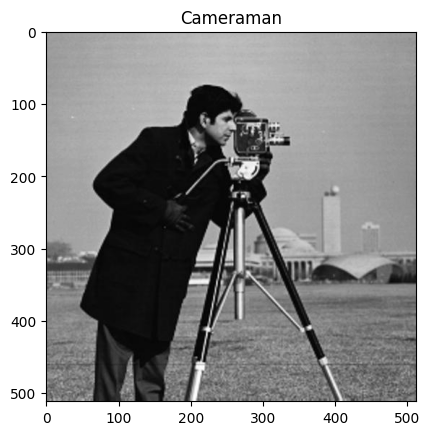

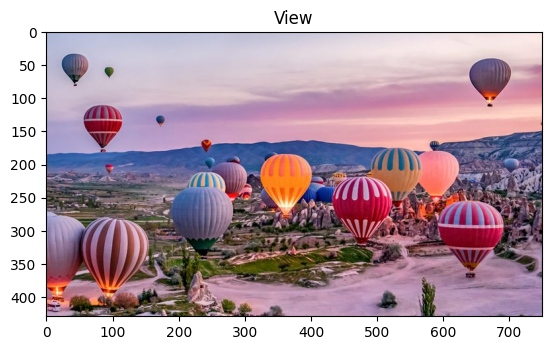

In [356]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(testimg1)
plt.title("Cameraman")
plt.show()


plt.figure()
plt.imshow(testimg2)
plt.title("View")
plt.show()

The camera man image is not true to its original colours, why does it look like that?

When you give a grayscale image to matplotlib, it uses a default colormap that is not necessarily "grayscale" to display the information. We can force it to display the image correctly by using the cmap parameter. We can also increase the size of the figure, hide the axis, and make sure that the scale is correct for the values (0 = black, 255 = white), as by default matplotlib uses the lowest value in the image as black and the highest as white.

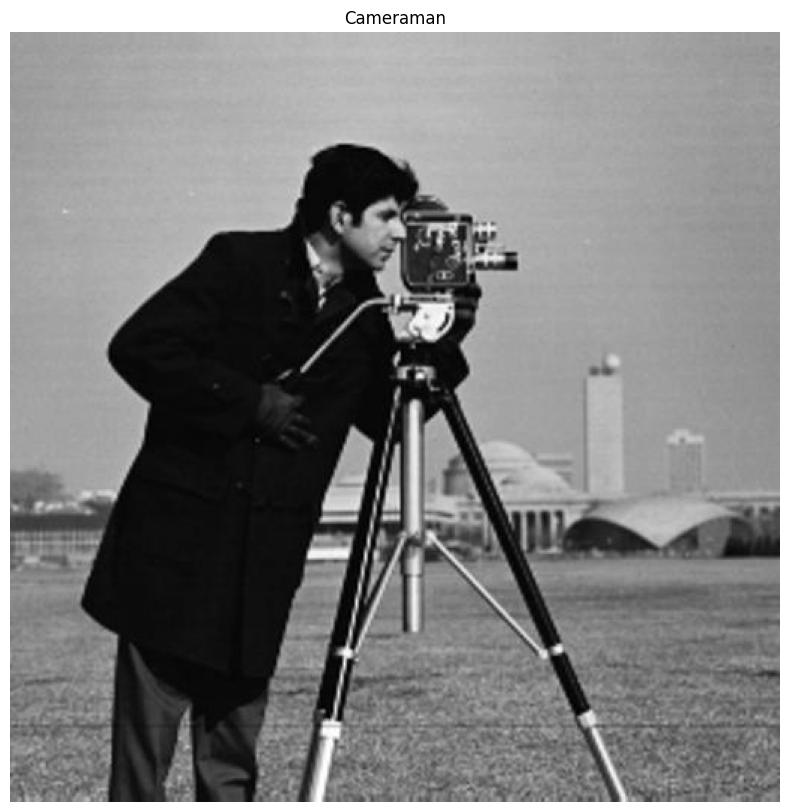

In [357]:
plt.figure(figsize=(10,10))
plt.imshow(testimg1, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.title("Cameraman")
plt.axis('off')
plt.show()

### **Plotting the histogram**

Now there are different ways to get the histogram for the greyscale and RGB images.

First let's work with the greyscale image (camera.jpg). 

We can use the histogram function from numpy, but let's first try to code it ourselves.
We need to :
1. Create a 256-length vector filled with 0s to initialize the histogram
2. For each value between 0 and 255, count how many pixels in the image have that value and put it in the histogram

In [358]:
# Create 256-length vector filled with 0s
hist = np.zeros((256,)).astype('int')
print("Empty histogram")
print(hist)

Empty histogram
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[ 207   90  143  184  247  365  617 1408 3236 4657 3874 5044 5873 6107
 6026 4381 2902 1504  861  648  566  506  479  459  397  398  390  397
  360  370  333  389  368  366  385  395  359  363  408  354  334  365
  364  326  307  277  255  295  261  250  249  271  259  270  254  301
  279  277  316  295  310  333  330  340  313  269  255  241  229  248
  234  216  222  243  220  222  198  188  204  209  234  216  235  210
  257  250  239  274  312  291  303  334  371  394  429  461  490  517
  571  577  628  698  735  789  791  834  884  951 1037 1020 1017 1104
 1109 1201 1210 1273 1279 1352 1339 1415 1501 1495 1518 1549 1554 1631
 1636 1670 1712 1705 1771 1626 1664 1634 1585 1713 1566 1559 1487 1397
 1501 1346 1412 1471 1629 1888 2007 2041 2126 2239 2272 2076 2086 2165
 2107 2491 2675 2807 3016 3348 3584 4228 4884 4848 4794 4463 4193 4014
 3694 3308 2936 2724 2752 2616 2556 2584 2590 2654 2789 2723 2815 2696
 2553 2348 2262 1970 1611 1158  824  522  354  269  249  208  190  212
  167 

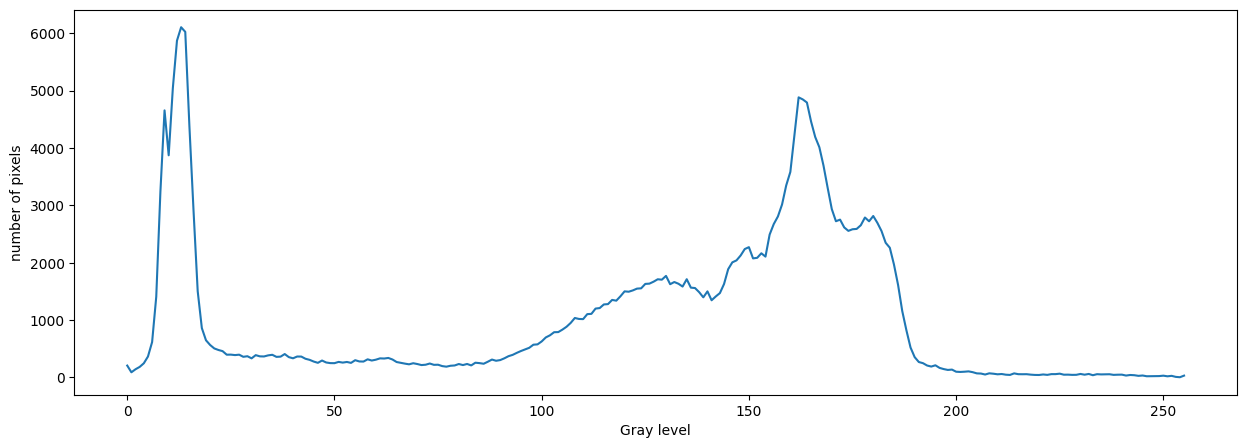

In [359]:
# For each value between 0 and 255 (python's range(a,b) translates to [a,b])
for v in range(0,256):
    hist[v] = (testimg1==v).sum()

#Compute histogram
print(hist)

#Plot histogram
plt.figure(figsize=(15,5))
plt.xlabel('Gray level')
plt.ylabel('number of pixels')
plt.plot(hist)
plt.show()

This line is a bit more complex, but it shows how powerful numpy can be for arrays operations. (im==v) does an element-wise comparison between the array im and the scalar v (the value we are looking at). It will create a new array of the same size as im, and fill it with True (1) wherever the pixel value of im was equal to v and with False (0) everywhere else.

Then, the sum function will sum all values of this new array. This counts the number of pixels with that particular value.

Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

In [360]:
# Compute the histogram #
print("Histogramme:")
print(hist)

Histogramme:
[ 207   90  143  184  247  365  617 1408 3236 4657 3874 5044 5873 6107
 6026 4381 2902 1504  861  648  566  506  479  459  397  398  390  397
  360  370  333  389  368  366  385  395  359  363  408  354  334  365
  364  326  307  277  255  295  261  250  249  271  259  270  254  301
  279  277  316  295  310  333  330  340  313  269  255  241  229  248
  234  216  222  243  220  222  198  188  204  209  234  216  235  210
  257  250  239  274  312  291  303  334  371  394  429  461  490  517
  571  577  628  698  735  789  791  834  884  951 1037 1020 1017 1104
 1109 1201 1210 1273 1279 1352 1339 1415 1501 1495 1518 1549 1554 1631
 1636 1670 1712 1705 1771 1626 1664 1634 1585 1713 1566 1559 1487 1397
 1501 1346 1412 1471 1629 1888 2007 2041 2126 2239 2272 2076 2086 2165
 2107 2491 2675 2807 3016 3348 3584 4228 4884 4848 4794 4463 4193 4014
 3694 3308 2936 2724 2752 2616 2556 2584 2590 2654 2789 2723 2815 2696
 2553 2348 2262 1970 1611 1158  824  522  354  269  249  208  19

Very often, instead of using this raw histogram, we will use the **"normalized histogram"**, which looks exactly the same except that we want the sum of all values to be equal to 1 (the histogram will therefore become like a probability distribution that a pixel in the image has a given value).

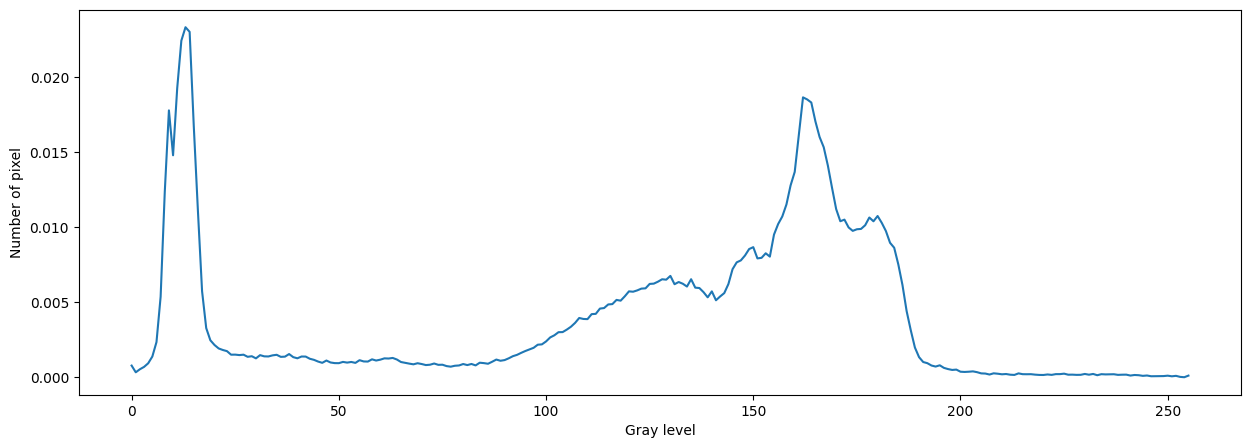

In [361]:
# Compute the normalized historgam
def norm_hist(hist):
    n_hist = hist/(hist.sum())
    return n_hist

#Plot Normalized histogram
plt.figure(figsize=(15,5))
plt.plot(norm_hist(hist))
plt.xlabel("Gray level")
plt.ylabel("Number of pixel")
plt.show()

We can also use the histogram method from numpy, but make sure to check the documentation on how to use it properly. Numpy's histogram method expects a flat vector, not a 2D image. Also, the "bins" of the histogram have to be specified, and the way they work is not necessarily intuitive: the numpy method is generalized so that it can work on float data and not just on integers, so the bins are defined by intervals rather than the discrete sampling that we've done above. There are multiple options for defining the intervals:

If you pass an integer to the "bins" parameter, numpy will divide the image range in that number of equally spaced bins. Note that if you do that on an image that doesn't start at 0 or end at 255 (for instance, and over- or under-exposed image), it will not give you the "correct" intervals:

In [362]:
im2 = testimg1.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10.  
hist_np, bins = np.histogram(im2.flatten(), bins=256)
print(bins[:5])

[10.         10.95703125 11.9140625  12.87109375 13.828125  ]


Alternatively, you can define the intervals yourself using a range, but here you should be aware of the (sometimes unexpected) behaviour of the method. If you have a range [0, 1, 2, 3], the histogram will contain 3 bins: [0, 1], [1, 2], and [2, 3], with the last bin including the last item in the range. In that case, if we have an integer image, the last bin would contain both the im==2 and the im==3 pixels! We can see this behaviour in action if we try to use a range (256):

In [363]:
im2 = testimg1.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10.  
hist_np, bins = np.histogram(im2.flatten(), bins=256)
print(bins[:5])

[10.         10.95703125 11.9140625  12.87109375 13.828125  ]


We can see that the histogram is a length-255 vector instead of 256, and if we compare to the one we computed manually, the last two bins have been put together. So if we want to reproduce the histogram we had before, we need to use a range(257), so that the last bin contains the interval [255, 256], correctly matching the im==255 bin !

In [364]:
# Compute the histogram #
hist, bins = np.histogram(testimg1.flatten(), bins = range(257))
print(hist)

[ 207   90  143  184  247  365  617 1408 3236 4657 3874 5044 5873 6107
 6026 4381 2902 1504  861  648  566  506  479  459  397  398  390  397
  360  370  333  389  368  366  385  395  359  363  408  354  334  365
  364  326  307  277  255  295  261  250  249  271  259  270  254  301
  279  277  316  295  310  333  330  340  313  269  255  241  229  248
  234  216  222  243  220  222  198  188  204  209  234  216  235  210
  257  250  239  274  312  291  303  334  371  394  429  461  490  517
  571  577  628  698  735  789  791  834  884  951 1037 1020 1017 1104
 1109 1201 1210 1273 1279 1352 1339 1415 1501 1495 1518 1549 1554 1631
 1636 1670 1712 1705 1771 1626 1664 1634 1585 1713 1566 1559 1487 1397
 1501 1346 1412 1471 1629 1888 2007 2041 2126 2239 2272 2076 2086 2165
 2107 2491 2675 2807 3016 3348 3584 4228 4884 4848 4794 4463 4193 4014
 3694 3308 2936 2724 2752 2616 2556 2584 2590 2654 2789 2723 2815 2696
 2553 2348 2262 1970 1611 1158  824  522  354  269  249  208  190  212
  167 

### **Now what can we do with this information?**

We can see that there are two great "peaks" : at around 15 (which would be almost black), and at around 160 (which is light gray). It seems like a reasonable guess to say that those values are mostly the cameraman's black coat, and the sky, which are both very homogeneous regions with a lot of pixels of the same color.

To check that, we could try to quickly segment the image using this information. Let's look at the image of all pixels between 10 and 20, and all pixels between 155 and 165:

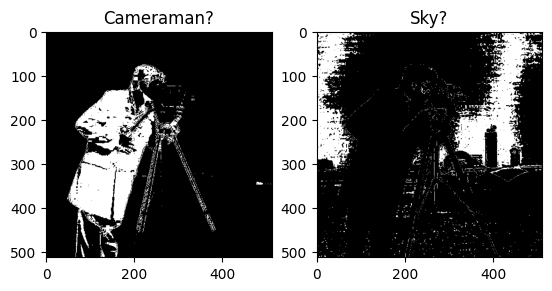

In [365]:
im = imread('camera.jpg')
dark_image = (im<=20)*(im>=10)
light_image = (im<=165)*(im>=155)

plt.figure()
plt.subplot(1,2,1) # Subplots can show multiple images on the same figure.
plt.imshow(dark_image, cmap=plt.cm.gray)
plt.title('Cameraman?')
plt.subplot(1,2,2)
plt.imshow(light_image, cmap=plt.cm.gray)
plt.title('Sky?')
plt.show()

That's not too bad, but clearly we don't have all of the sky. We can in fact see in our histogram that the peak is wider for the sky than for the cameraman. Let's try to find better values:

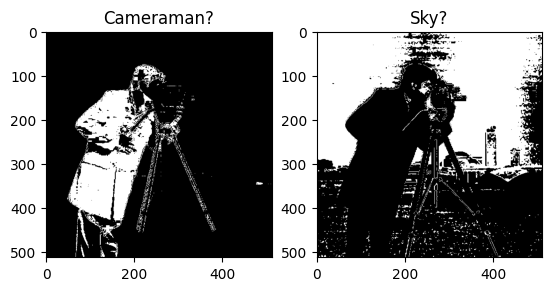

In [366]:
# Improve the threshold #
im = imread('camera.jpg')
dark_image = (im<20)*(im>=10)
light_image = (im<185)*(im>=150)

plt.figure()
plt.subplot(1,2,1) # Subplots can show multiple images on the same figure.
plt.imshow(dark_image, cmap=plt.cm.gray)
plt.title('Cameraman?')
plt.subplot(1,2,2)
plt.imshow(light_image, cmap=plt.cm.gray)
plt.title('Sky?')
plt.show()

That's far from perfect but it's good enough for now. But with this, try to answer these questions :

The average gray value of the cameraman is around 15.
The average gray value of the sky is around 165.


The peak of the cameraman is higher than the peak of the sky, but the peak of the sky is wider. To know if there is more in one or the other, we have to compute the sum of those regions of the histogram.

In [367]:
#Calculate the number of pixels
pixels_in_cameraman = dark_image.sum()
pixels_in_sky = light_image.sum()
print(f"There are around {pixels_in_cameraman} pixels in the cameraman and around {pixels_in_sky} pixels in the sky")

There are around 37220 pixels in the cameraman and around 106651 pixels in the sky


This seems to indicate that there are more pixels in the sky.

### **Plotting the cummulative histogram**

Cumulative histogram is a mapping that counts the cumulative number of pixel intensity values in all ofthe bins up to the current bin.
The cumulative histogram of a histogram is defined as : 

$Ci = \sum_{j=0}^i h_j$

The cumulative histogram is useful for some imageoperations that use histograms: such as Image histogram equalisation

Compute and plot the **cumulated histogram**.

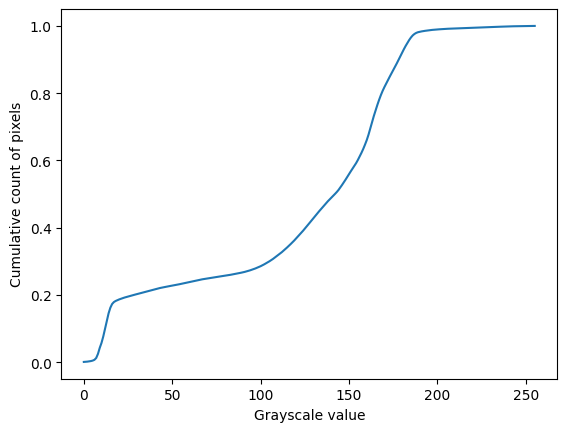

In [368]:
# Initialize cumulative histogram

def cum_hist(img):
    hist,bins = np.histogram(img.flatten(),range(257))
    # Initialize cumulative histogram
    c_hist = np.zeros((256,))

    # Compute values
    c = 0
    for j in range(256):
        c += hist[j]
        c_hist[j] = c

    # We can also normalize so that it shows "% of pixels <= than a certain value":
    c_hist /= c_hist.max()
    return c_hist
    
plt.figure()
plt.plot(cum_hist(testimg1))
plt.xlabel('Grayscale value')
plt.ylabel('Cumulative count of pixels')
plt.show()

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

### Histogram Analysis of RGB image

Let's start by having a look at the immunohistochemistry image.

(512, 512, 3)
0 255


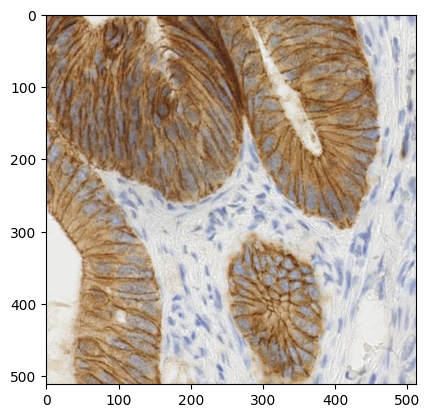

In [369]:
from skimage.data import immunohistochemistry

im = immunohistochemistry()
print(im.shape)
print(im.min(),im.max())

plt.figure()
plt.imshow(im)
plt.show()

As seen with the view.jpg image, the immunohistochemistry image also has dimensions of 512x512 pixels, with 3 8-bits channels (values between 0 and 255).

We want to isolate the "brown cells" in the RGB and HSV space. To see what we are dealing with, it would be interesting to first have a look at the histograms for the different channels. Let's start in RGB.

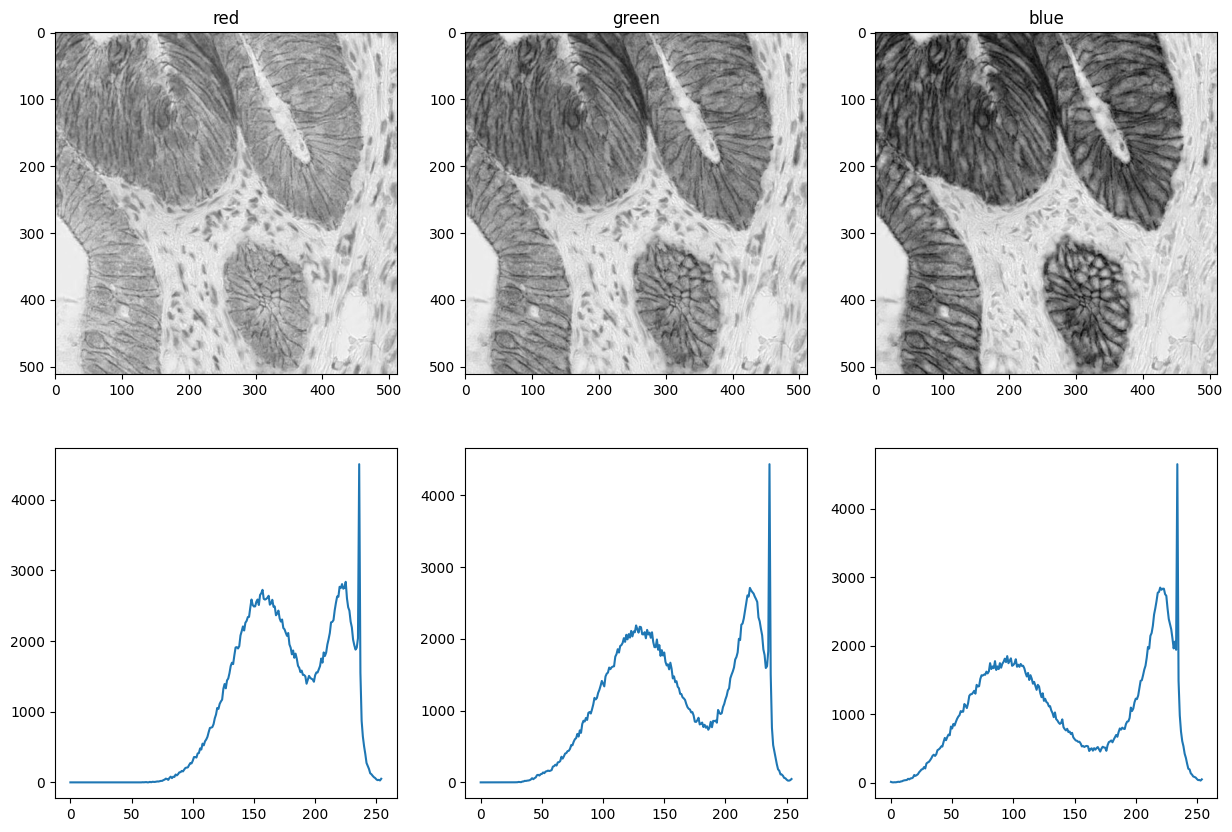

In [370]:
# Separate the RGB channel of the the image #
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

hist_r, bins_r = np.histogram(r.flatten(), bins = range(256))
hist_g , bins_g = np.histogram(g.flatten(), bins = range(256))
hist_b , bins_b = np.histogram(b.flatten(), bins = range(256))

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(r,cmap= 'gray',vmin=0, vmax=255)
plt.title('red')
plt.subplot(2,3,2)
plt.imshow(g,cmap = 'gray', vmin=0, vmax=255)
plt.title('green')
plt.subplot(2,3,3)
plt.imshow(b, cmap= 'gray',vmin=0, vmax=255)
plt.title('blue')
plt.subplot(2,3,4)
plt.plot(hist_r)
plt.subplot(2,3,5)
plt.plot(hist_g)
plt.subplot(2,3,6)
plt.plot(hist_b)
plt.show()

We see that the 3 histograms have a similar shape, with 3 distinct peaks. 

Let's try to find out exactly where they are by finding the local maxima (that I'll define here as "higher value than anything in a size-10 neighbourhood and >= than 0")

In [371]:
print("Candidats couleur brune: \n",im[:2,:2,:])

Candidats couleur brune: 
 [[[156 118  81]
  [163 125  88]]

 [[141 105  69]
  [144 108  72]]]


The closest peaks to those values would be red=157, green=127, blue=95, which would be a bit brighter on average. This makes sense: the top-left corner is a darker brown than most brown pixels in the image.

Let's use [157,127,95] as our "brown" reference.

If we represent each color as a point in (R,G,B) space, we can compute an euclidian "color distance" between a pixel and this brown reference as :

$d_{colour} = \sqrt{(R-R_{ref})^2 + (G-G_{ref}) + (B-B_{ref})^2)}$

We can try to visualize this using mplot3d. Each point in the  scatterplot below is a pixel from the image, set in the RGB space. The larger point is the "reference brown".

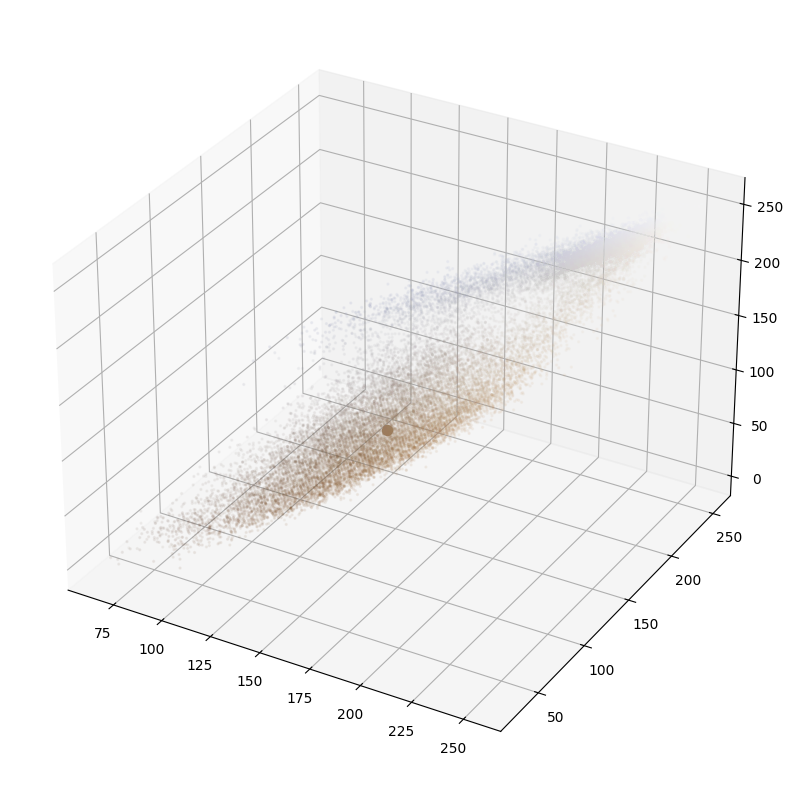

In [372]:
ref_brown = np.array([157.,127.,95.])

from mpl_toolkits.mplot3d import Axes3D
pixels = im.reshape((im.shape[0]*im.shape[1],3))[::10,:] # we take 1/10th of the pixels, because otherwise it takes too long to render.
col = np.zeros((pixels.shape[0],4)) # we create a RGBA array so that we can give transparency to the points and better see everything
col[:,:3] = pixels/255
col[:,3] = 0.1
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:,0], pixels[:,1], pixels[:,2], s=2, c=col)
ax.scatter(ref_brown[0],ref_brown[1],ref_brown[2],s=50,c=[ref_brown/255])
plt.show()

In image processing measuring and valuing a distance between two points is important. 
The Euclidean distance tools describe each cell's relationship to a source or a set of sources based on the straight-line distance.

[[ 16.673332     9.43398113  17.8325545  ... 106.37198879 122.44182292
  150.61540426]
 [ 37.62977544  32.54228019  39.45883931 ... 121.83185134 119.64948809
  128.74004816]
 [ 59.53990259  47.4341649   38.89730068 ... 131.53706702 114.06138698
  111.30588484]
 ...
 [159.28904545 167.74385235 181.31188599 ... 150.41608956 150.60544479
  155.63097378]
 [153.99025943 162.41305366 175.9374889  ... 155.24496771 145.59189538
  150.98675439]
 [162.41305366 162.41305366 165.78902256 ... 148.58330996 142.62538344
  150.98675439]]


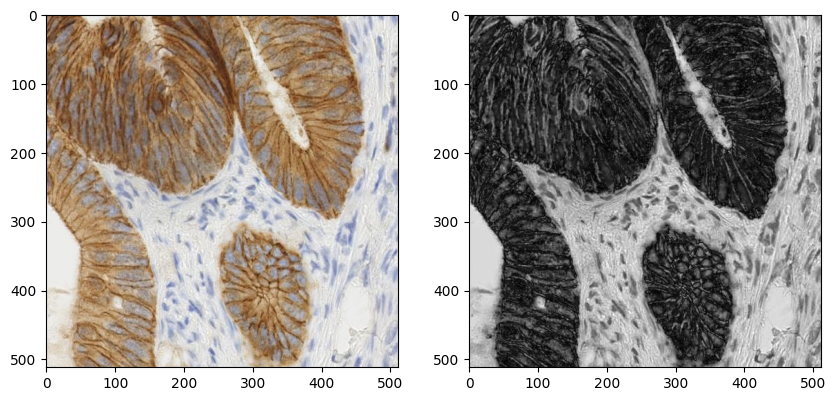

In [373]:
# Compute the Eucledian distance #
# Eucledian distance = sqrt( sum( difference^2 ) )
RGB_dist = np.sqrt(((im.astype('float')-ref_brown)**2).sum(axis=2))
print(RGB_dist)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(RGB_dist,cmap='gray')
plt.show()

We can look at the histogram of the "distance" image to see if we can find a threhold that looks interesting:

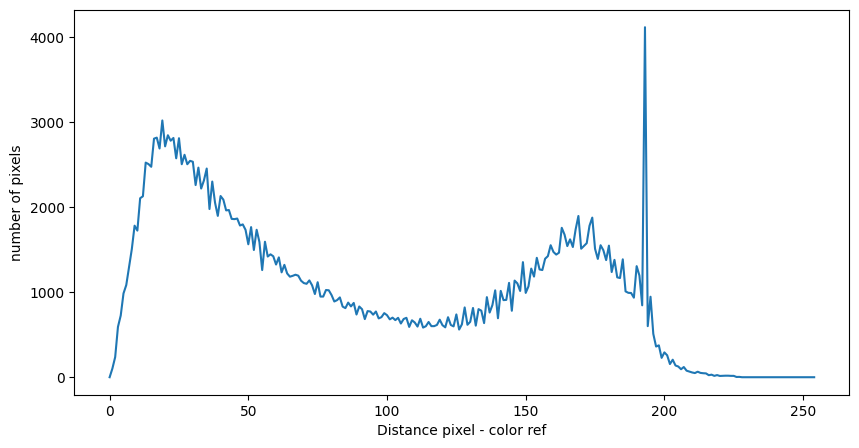

In [374]:
# Plot the histogram #
dist_RGB_hist , dist_bins= np.histogram(RGB_dist.flatten(), range(256))

plt.figure(figsize=(10,5))
plt.xlabel("Distance pixel - color ref")
plt.ylabel("number of pixels")
plt.plot(dist_RGB_hist)
plt.show()

Let's try a few possible candidates : right after the left peak (~30), somewhere in the down-slope (~50), at the low point in the middle (~120)

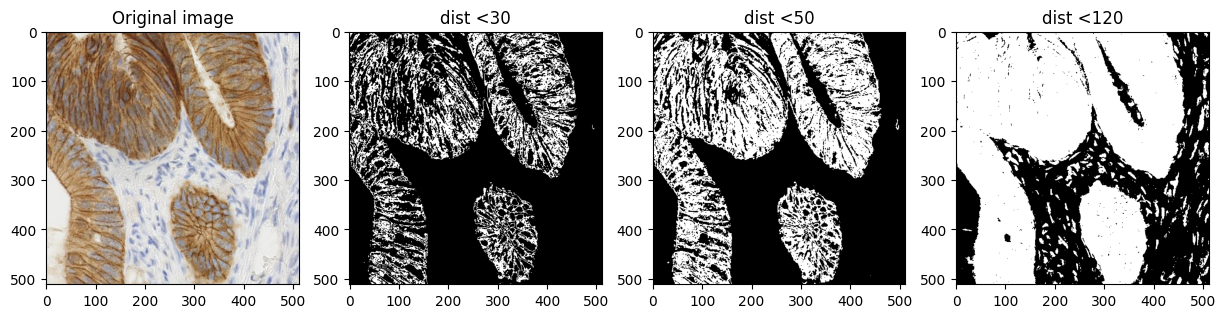

In [375]:
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
plt.imshow(im)
plt.title('Original image')
plt.gray()
plt.subplot(1,4,2)
plt.imshow(RGB_dist<30)
plt.title('dist <30')
plt.subplot(1,4,3)
plt.imshow(RGB_dist<50)
plt.title('dist <50')
plt.subplot(1,4,4)
plt.imshow(RGB_dist<120)
plt.title('dist <120')
plt.show()

#plus en plus de blanc car moins en moins d'exigence sur la distance par rapport au brun de ref

The second one doesn't look bad. There is still a lot of confusion between the brown and the blue, however. In RGB space, it will be difficult to do better.

Let's now look at the hsv color-space to see if it might be easier to analyze the image there. We first need to convert the image:

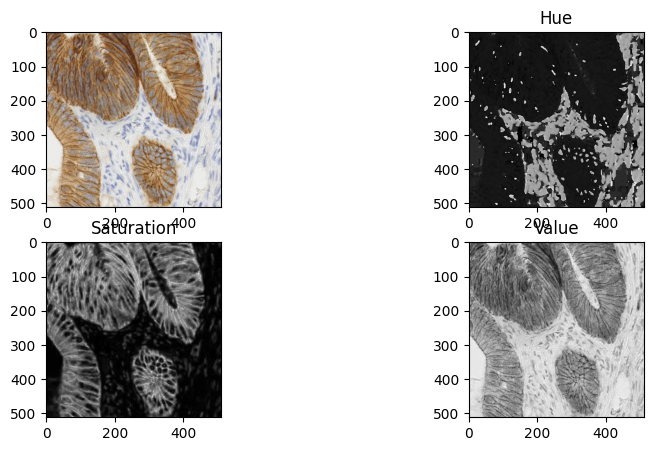

In [376]:
from skimage.color import rgb2hsv
# Convert to HSV-space #
hsv = rgb2hsv(im)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(im)
plt.subplot(2,2,2)
plt.imshow(h,cmap=plt.cm.gray) #Hue: Represents the color type (0-360 degrees on the color wheel).
plt.title('Hue')
plt.subplot(2,2,3)
plt.imshow(s,cmap=plt.cm.gray) #Saturation: Represents the intensity or purity of the color (0-100%).
plt.title('Saturation')
plt.subplot(2,2,4)
plt.imshow(v,cmap=plt.cm.gray) #Value: Represents the brightness of the color (0-100%).
plt.title('Value')
plt.show()


The hue is normally expressed as an angle (in radian or degrees), but is here encoded as a float between 0 and 1. To show the histogram, we can simply multiply that number by 360 to "convert" it to degrees.

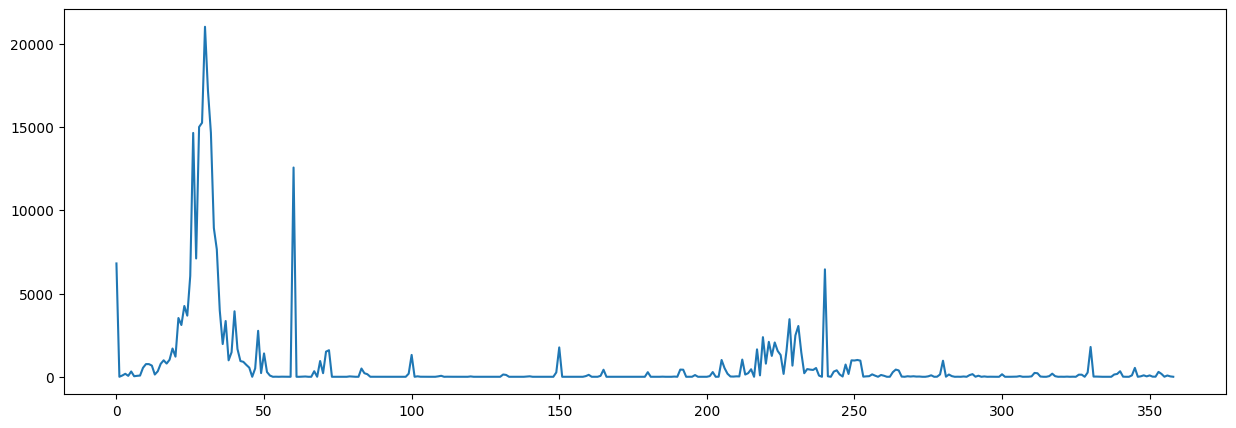

In [377]:
# Plot the histogram #
h_hist, h_bins = np.histogram(h.flatten()*360, range(360))

plt.figure(figsize=(15,5))
plt.plot(h_hist)
plt.show()

So now we have a very sharp peak in the colour space. Let's find its value, and see what the "distance map" looks like, and how it compares to the distance in RGB space.

Global max: 30


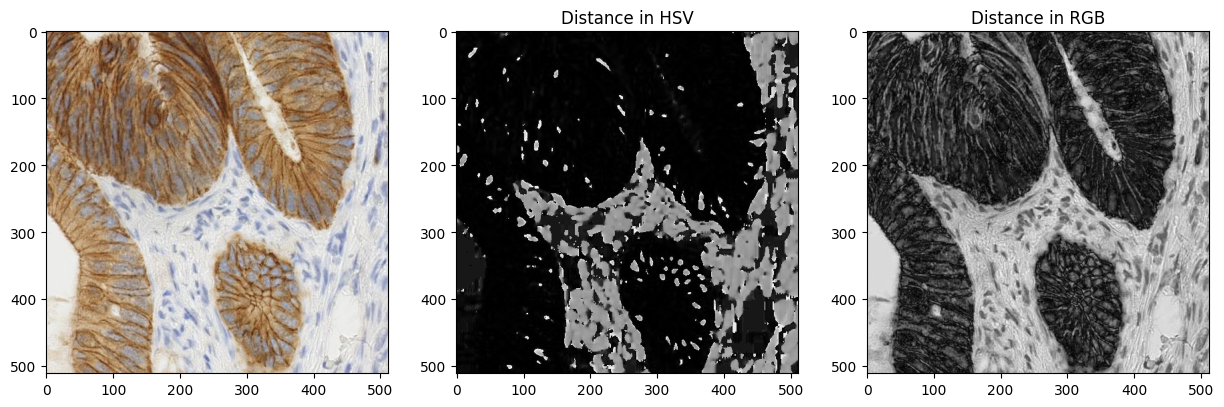

In [378]:
## -- Your code here -- ##
global_max= h_hist.argmax()
print("Global max:",global_max)

hue_brown = global_max/360

hue_dist = np.abs(h-hue_brown) #1-D distance in the H space

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(hue_dist)
plt.title('Distance in HSV')
plt.subplot(1,3,3)
plt.imshow(RGB_dist)
plt.title('Distance in RGB')
plt.show()

We can also compare the histograms of the distances :

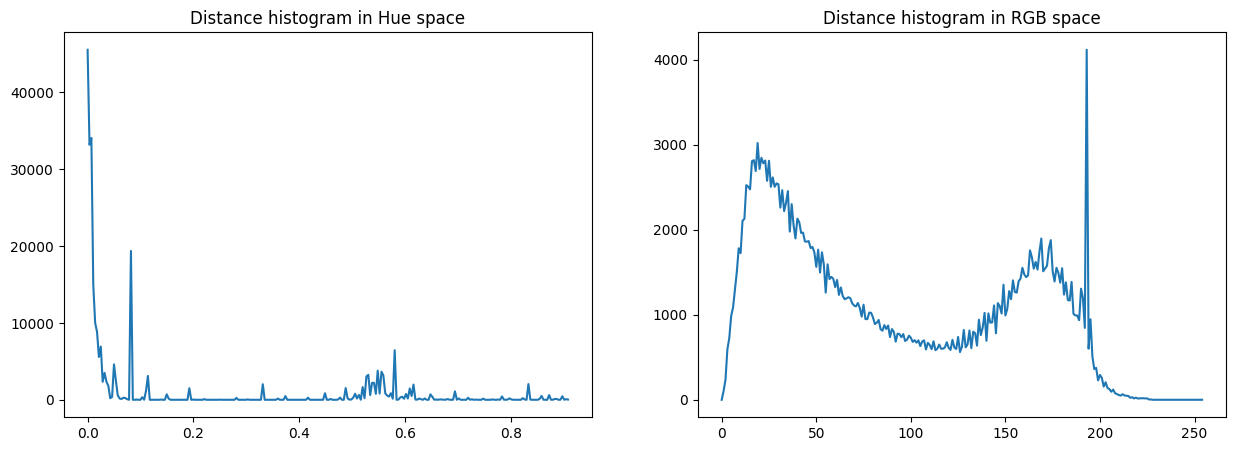

In [379]:
# Plot the histogram #
hue_dist_hist,hue_dist_bins = np.histogram(hue_dist.flatten(),256)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hue_dist_bins[:-1],hue_dist_hist)
plt.title('Distance histogram in Hue space')
plt.subplot(1,2,2)
plt.plot(dist_RGB_hist)
plt.title('Distance histogram in RGB space')
plt.show()

As we can see, there is a much sharper peak in Hue space, which means that the brown pixels tend to be much "closer" together. This is normal, as in HSV space the differences in "saturation" and "value" (which can be seen as the color-to-gray scale and the light-to-dark scale) are independant from the differences in hue (the color-to-color scale).

This means that a "light brown" and a "dark brown", which can be very different in RGB space, will be very close together in Hue space. Let's try to find a good threshold for the Hue distance:

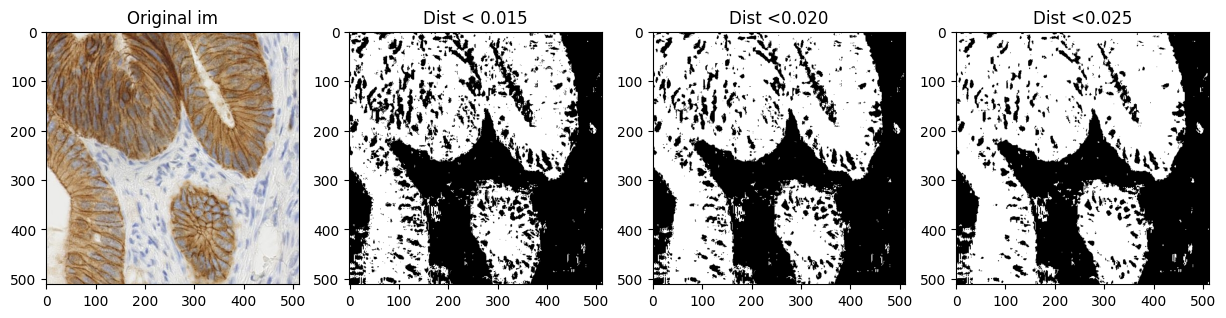

In [380]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(im)
plt.title('Original im')
plt.subplot(1,4,2)
plt.imshow(hue_dist< 0.015 )
plt.title('Dist < 0.015')
plt.subplot(1,4,3)
plt.imshow(hue_dist<0.020)
plt.title('Dist <0.020')
plt.subplot(1,4,4)
plt.imshow(hue_dist < 0.025)
plt.title('Dist <0.025')
plt.show()

We can see that there are still some problems, with pixels from the background which are seen as brown. That's because those pixels are fully saturated (completely gray), which means that their hue is mostly random. We can easily get rid of them by adding a threshold on the the saturation channel:

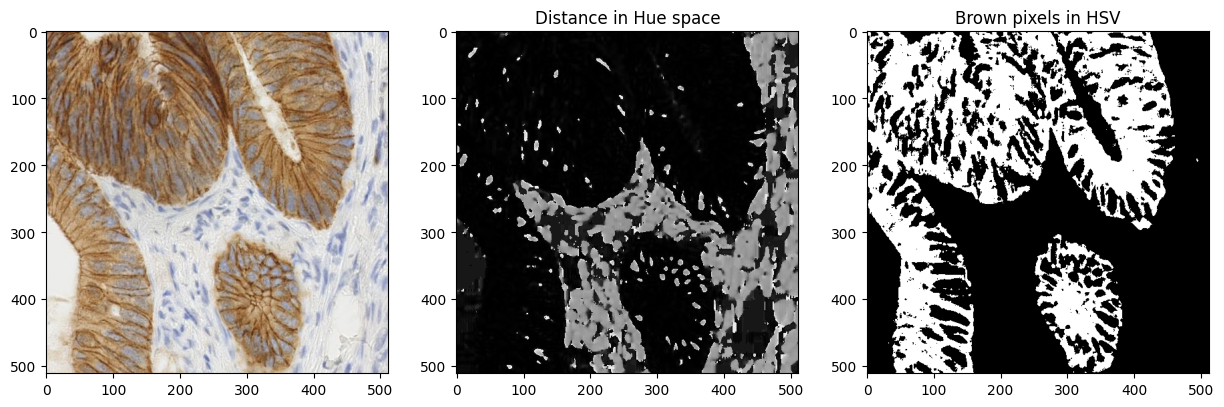

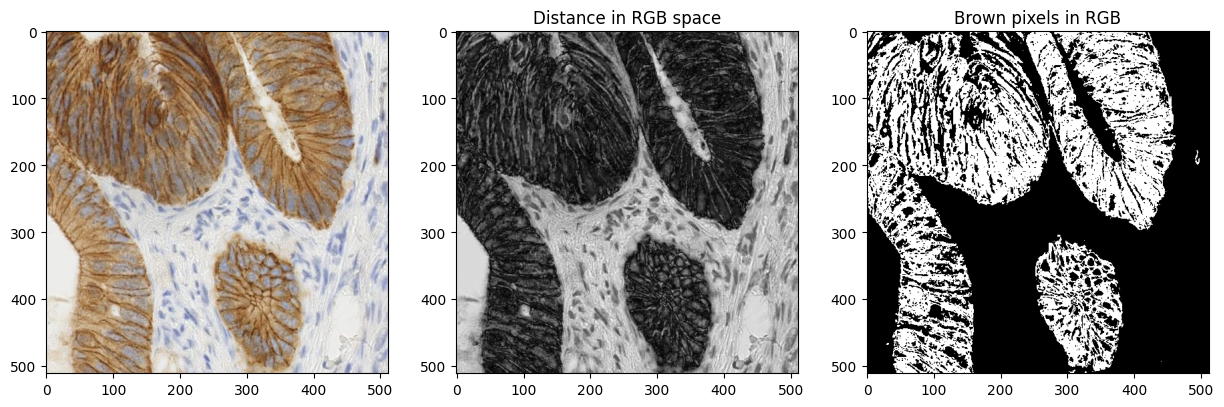

In [381]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(hue_dist)
plt.title('Distance in Hue space')
plt.subplot(1,3,3)
plt.imshow((hue_dist < 0.015)*(hsv[:,:,1]>0.3))
plt.title('Brown pixels in HSV')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(RGB_dist)
plt.title('Distance in RGB space')
plt.subplot(1,3,3)
plt.imshow(RGB_dist<50)
plt.title('Brown pixels in RGB')
plt.show()

#pixels gris = fully *unsatured => hue mostly random => we have to take the high satured pixels

To better visualize those results, we can use the segmentation as a mask to remove all non-brown pixels and compare the HSV and RGB images.

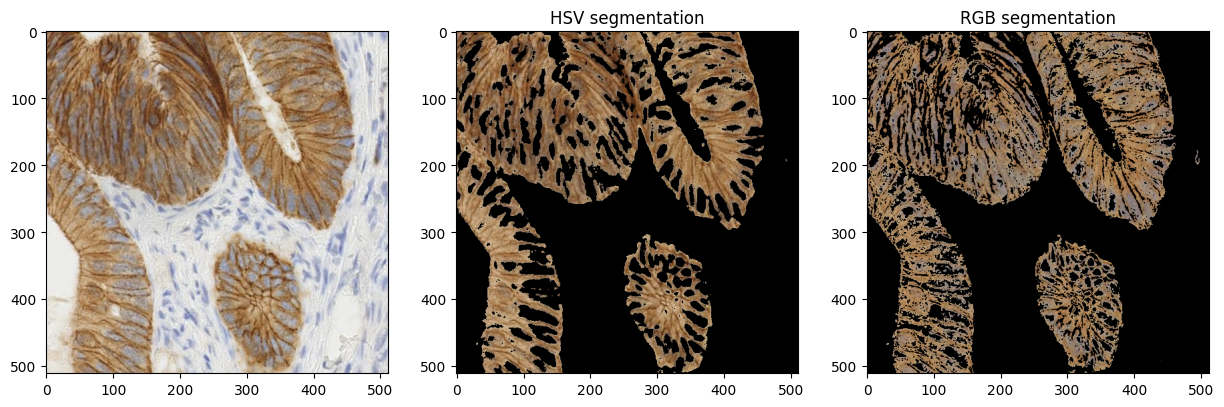

In [382]:
# Hue and RGB masks
mask_hsv = (hue_dist < 0.025)*(hsv[:,:,1]>0.3)
mask_rgb = RGB_dist<50
# Image to mask
im_hsv_masked = im.copy()
im_rgb_masked = im.copy()
#Apply masks
im_hsv_masked[mask_hsv==False] = 0
im_rgb_masked[mask_rgb==False] = 0
#Plot results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(im_hsv_masked)
plt.title('HSV segmentation')
plt.subplot(1,3,3)
plt.imshow(im_rgb_masked)
plt.title('RGB segmentation')
plt.show() 

Unsurprisingly, the HSV results are much better, as the color information is encoded in a way that makes it easier to use. RGB color space is a good way to encode the information for display (as it directly relates to the way the screen will show it), but isn't always very practical for analysis.

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.


### **1. Compute the image entropy of the camera.jpg image.** 

The image entropy is given by:
           
$e = - \sum_{g=0}^N p(g) \log_2(p(g))$ 

where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that $p(g)$ is directly given by the normalized histogram.

The entropy is generally computed using the base 2 logarithm, so that we can give it the information theory interpretation of "number of bits per element" necessary to encode the data

In [383]:
import numpy as np
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt

def entropy (im):
    #compute normalized histogram -> p(g)
    hist,bins = np.histogram(im.flatten(),range(256))
    p = hist/hist.sum()
    #compute the entropy e
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    return e

The entropy will be higher when you have an even distribution of grayscale vale, and lower if the image is more homogeneous. We can look at the extreme cases of a completely random image, and of a uniform image:

Entropy of the even grayscale image :  7.975327613493473
Entropy of the uniform image :  -0.0


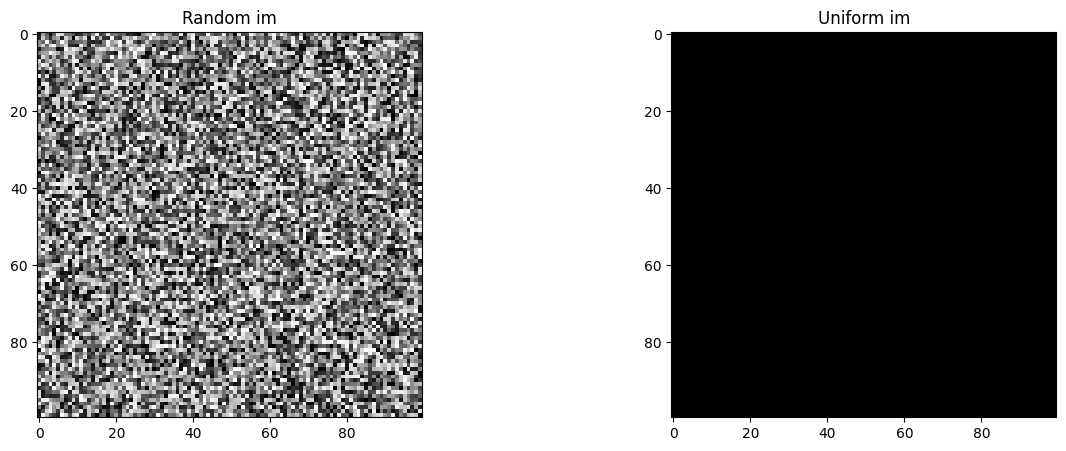

In [384]:
random_im = (np.random.random((100,100))*255).astype('uint8')
uniform_im = np.zeros((100,100)).astype('uint8')
print("Entropy of the even grayscale image : ",entropy(random_im))
print("Entropy of the uniform image : ", entropy(uniform_im))
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.imshow(random_im, cmap="gray")
plt.title("Random im")
plt.subplot(1,2,2)
plt.imshow(uniform_im, cmap="gray")
plt.title("Uniform im")
plt.show()

A truly uniform distribution would have an entropy of 8 (which corresponds to the number of bits per pixels necessary to encode the information), while a uniform image has an entropy of 0.

Now let's apply this to the cameraman:

Entropy of the cameraman image : 7.0653829287278995


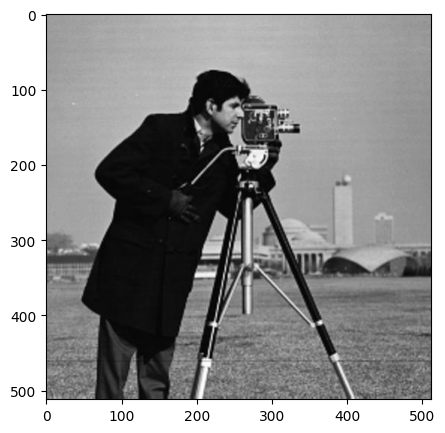

In [385]:
#compute the entropy for camera.jpg
print('Entropy of the cameraman image :', entropy(testimg1))
plt.figure(figsize=(15,5))
plt.imshow(testimg1,cmap='gray')
plt.show()

### **2. What is the entropy of a shuffled version of the cameraman?**

As the entropy is computed on the histogram of the image, it doesn't take into account any sort of spatial information. If we shuffle the cameraman image randomly, it may seems like we produce a "random" image, but the entropy is exactly the same:

Entropy of the cameran image :  7.0653829287278995
Entropy of the suffled cameran image :  7.0653829287278995


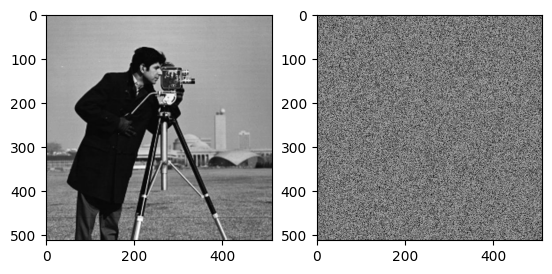

In [386]:
im_shuf = testimg1.copy().flatten() # It's easier to shuffle the image if it's first flattened in 1D
np.random.shuffle(im_shuf) # The shuffle function directly affect the array given as parameter and doesn't make a copy of it!
im_shuf = im_shuf.reshape((testimg1.shape)) # Reshape to the original 2D image shape
print("Entropy of the cameran image : ", entropy(testimg1))
print("Entropy of the suffled cameran image : ", entropy(im_shuf))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(testimg1, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(im_shuf, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()

**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

- **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

![ ](image.png)



Subsampling is a way of reducing the size of an image. 

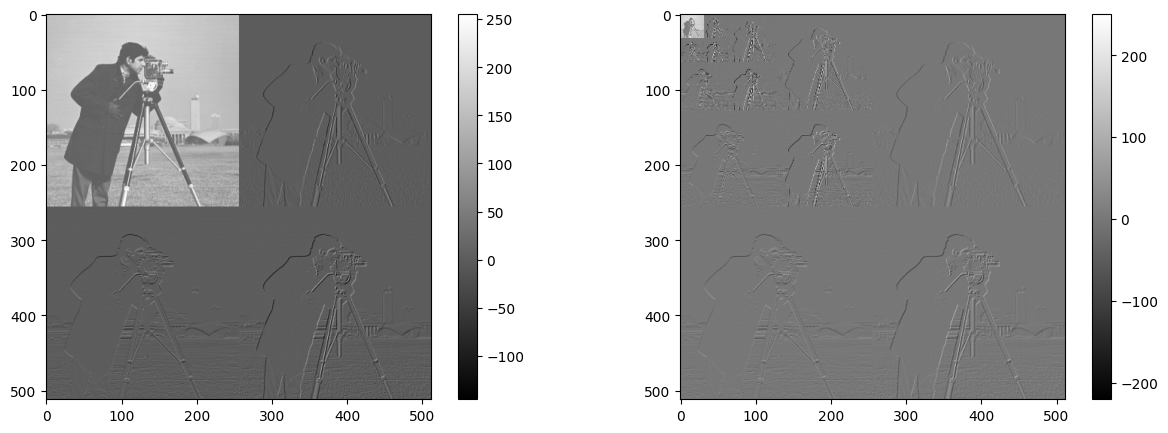

In [422]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im,deep):
    im = im.astype('int16')
    if (deep!=0):
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a

        a = split(a,deep-1)
        return np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return im

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
im2 = split(im,1)
im3 = split(im,4)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(im2)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(im3)
plt.colorbar()
plt.show()

#l'image parait plus clair, pcq les valeurs de gris sont réparties sur 2x256 valeurs

**Compute how the image entropy evolves** with regards to the level of decomposition

<function matplotlib.pyplot.show(close=None, block=None)>

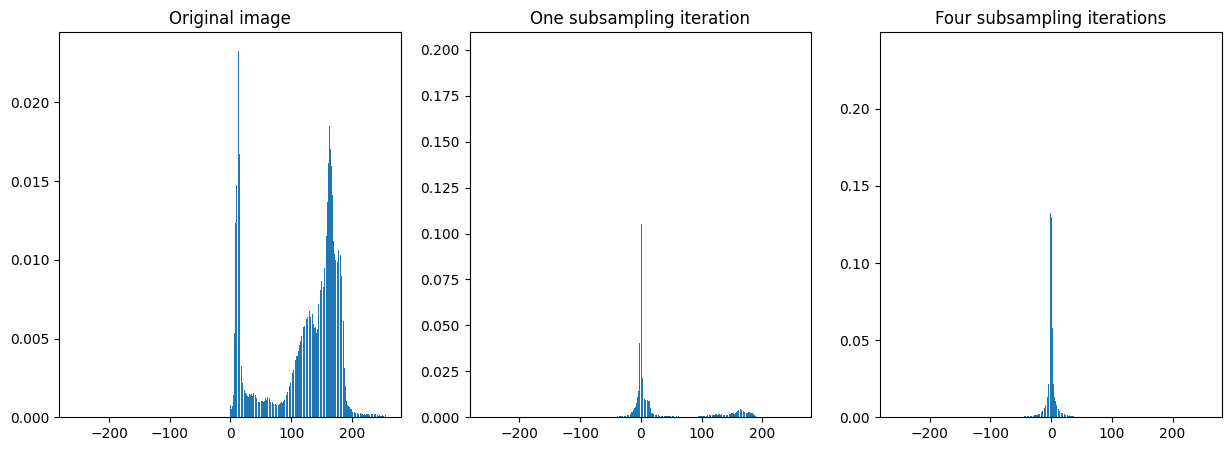

In [424]:
#entropy will tend to be higher when we have a flatter histogram, and it will be lower when we have narrow peaks
#the idea here is that pixels that are very close together in the image will tend to have very similar value; borders not included

#Bar histogram
def bar_hist(im):
    hist, bins = np.histogram(im, bins = range(-256,257), density=True) # hist centred in 0 because potential negative values
    return hist

plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
plt.bar(bins[:-1],bar_hist(im))
plt.title(f"Original image")
plt.subplot(1,3,2)
plt.bar(bins[:-1],bar_hist(im2))
plt.title(f"One subsampling iteration")
plt.subplot(1,3,3)
plt.bar(bins[:-1],bar_hist(im3))
plt.title(f"Four subsampling iterations")
plt.show

#Bcp plus de valeurs autour de 0, car avce la méthode pour subsampled, on soustrait les pixels voisins entre eux et ceux-ci sont très similaires


We can easily observe that the entropy has gone down quite a bit, which was our goal, without losing any information

**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

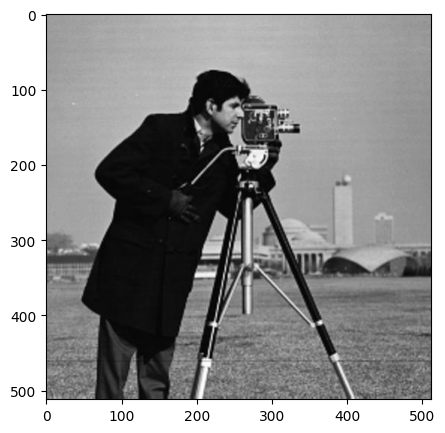

In [426]:
#Advantage of the subsampled method is the reconstruction is very simple: just some addition
def reconstruct(im,deep):
    if (deep!=0):
        midx = im.shape[1]//2
        midy = im.shape[0]//2
        a = reconstruct(im[:midy,:midx],deep-1)
        b = im[:midy,midx:] 
        c = im[midy:,:midx] 
        d = im[midy:,midx:] 
        
        im2 = im.copy()
        im2[::2,::2] = a
        im2[::2,1::2] = b+a
        im2[1::2,::2] = c+a
        im2[1::2,1::2] = d+a
        return im2
    return im

plt.figure(figsize=(15,5))
plt.imshow(reconstruct(im2,1), cmap=plt.cm.gray)
plt.show()

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

In [ ]:
from skimage.feature import graycomatrix
from skimage.io import imread
import numpy as np
im = imread('camera.jpg')

distances = [5,50] # Distances in pixels that we want to check
angles = [0, np.pi/2] # Angles in radians that we want to check

co_matrices = graycomatrix(im, distances, angles)
print(co_matrices[:,:,0,0].shape)


(256, 256)


As we can see, short distances have most of the values of the co-occurence matrix close to the diagonal. This means that pixels that are close spatially tend to also have similar values. If we look at a longer distance, we will see a flatter distribution, and therefore a higher entropy.

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

![ ](wm_proj.jpg)

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image


(85, 219, 3) 0 255


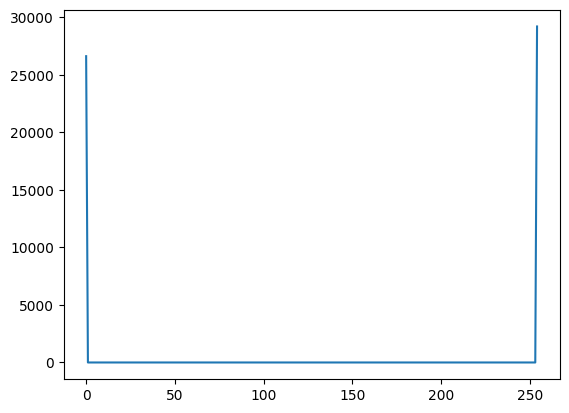

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [431]:
wtm = imread('watermark.png')
print(wtm.shape, wtm.min(), wtm.max())
#creation d'un mask de taille de l'image
mask = (np.zeros((256,256))).astype('uint8')
hist, bins = np.histogram(wtm.flatten(), range(256))
plt.figure()
plt.plot(hist)
plt.show()
print(wtm)
